ML Assignment1 with normal Distributions


In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("data.csv")

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Remove the first column 'id' and unnamed from this dataset:

In [8]:
data.drop(labels=[data.columns[0],data.columns[32]],axis=1,inplace=True)

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
diagnosis_unique_values = data['diagnosis'].unique()

In [11]:
diagnosis_unique_values

array(['M', 'B'], dtype=object)

In [12]:
radius_mean_unique_values = data['radius_mean'].unique()

In [13]:
radius_mean_unique_values

array([17.99 , 20.57 , 19.69 , 11.42 , 20.29 , 12.45 , 18.25 , 13.71 ,
       13.   , 12.46 , 16.02 , 15.78 , 19.17 , 15.85 , 13.73 , 14.54 ,
       14.68 , 16.13 , 19.81 , 13.54 , 13.08 ,  9.504, 15.34 , 21.16 ,
       16.65 , 17.14 , 14.58 , 18.61 , 15.3  , 17.57 , 18.63 , 11.84 ,
       17.02 , 19.27 , 16.74 , 14.25 , 13.03 , 14.99 , 13.48 , 13.44 ,
       10.95 , 19.07 , 13.28 , 13.17 , 18.65 ,  8.196, 12.05 , 13.49 ,
       11.76 , 13.64 , 11.94 , 18.22 , 15.1  , 11.52 , 19.21 , 14.71 ,
       13.05 ,  8.618, 10.17 ,  8.598,  9.173, 12.68 , 14.78 ,  9.465,
       11.31 ,  9.029, 12.78 , 18.94 ,  8.888, 17.2  , 13.8  , 12.31 ,
       16.07 , 13.53 , 18.05 , 20.18 , 12.86 , 11.45 , 13.34 , 25.22 ,
       19.1  , 12.   , 18.46 , 14.48 , 19.02 , 12.36 , 14.64 , 14.62 ,
       15.37 , 13.27 , 13.45 , 15.06 , 20.26 , 12.18 ,  9.787, 11.6  ,
       14.42 , 13.61 ,  6.981,  9.876, 10.49 , 13.11 , 11.64 , 22.27 ,
       11.34 ,  9.777, 12.63 , 14.26 , 10.51 ,  8.726, 11.93 ,  8.95 ,
      

Let's see that in each of the cases, how many unique values are there:

In [14]:
len(diagnosis_unique_values)

2

In [15]:
len(radius_mean_unique_values)

456

Creating a function for find the variable is continous or discrete

In [16]:
def determine_random_variable_type(column_name):
    
    if (type(data[column_name]) == str or type(data[column_name]) == int) and (len(data[column_name].unique()) < len(data[column_name])):
        
        return 'discrete'
    
    else:
        
        return 'continous'


The above function will take the name of the single column of the dataset and access the data of that column from the dataset and check the datatype or nature of the values inside that column and also the total number of unique values in that column and check the conditions for the random variable or that specific column being discrete or continous and returns the the type of random variable as strings 'discrete' or 'continous'. 





In [17]:
def calculate_L_max_normal(column_name):
    
    mu_best_normal = data[column_name].mean()
    
    sigma_best_normal = data[column_name].std()
    
    L_max_normal = np.sum(s.norm.logpdf(data[column_name],loc=mu_best_normal,scale=sigma_best_normal))
    return L_max_normal

In [18]:
import numpy as np
import scipy.stats as s

In [19]:
def calculate_L_max_rayleigh(column_name):
    
    sigma_best_rayleigh = np.sqrt(np.mean(data[column_name].apply(lambda x: x**2))/2)
    
    L_max_rayleigh = np.sum(s.rayleigh.logpdf(data[column_name],scale=sigma_best_rayleigh))
    
    return L_max_rayleigh

In [20]:
def determine_distribution_type(column_name):
    
    column_type = determine_random_variable_type(column_name)
    
    if column_type == 'discrete':
          
            if len(data[column_name].unique()) == 2:
            
            
                return 'binomial'
        
            else:
            
                return 'multinomial'
        
        
    else:
        
         L_max_normal = calculate_L_max_normal(column_name) 
        
         L_max_rayleigh = calculate_L_max_rayleigh(column_name) 
        
         if L_max_normal > L_max_rayleigh:
            
            return 'normal'
        
         else:
            
            return 'rayleigh'

In [21]:
import numpy as np

In [24]:
Distributions = {}

for single_column in data.columns[1:]:
    
     Distributions[single_column] = determine_distribution_type(single_column)

In [25]:
Distributions

{'radius_mean': 'normal',
 'texture_mean': 'normal',
 'perimeter_mean': 'normal',
 'area_mean': 'rayleigh',
 'smoothness_mean': 'normal',
 'compactness_mean': 'rayleigh',
 'concavity_mean': 'normal',
 'concave points_mean': 'normal',
 'symmetry_mean': 'normal',
 'fractal_dimension_mean': 'normal',
 'radius_se': 'rayleigh',
 'texture_se': 'rayleigh',
 'perimeter_se': 'rayleigh',
 'area_se': 'rayleigh',
 'smoothness_se': 'rayleigh',
 'compactness_se': 'rayleigh',
 'concavity_se': 'normal',
 'concave points_se': 'normal',
 'symmetry_se': 'normal',
 'fractal_dimension_se': 'rayleigh',
 'radius_worst': 'normal',
 'texture_worst': 'normal',
 'perimeter_worst': 'normal',
 'area_worst': 'rayleigh',
 'smoothness_worst': 'normal',
 'compactness_worst': 'rayleigh',
 'concavity_worst': 'normal',
 'concave points_worst': 'normal',
 'symmetry_worst': 'normal',
 'fractal_dimension_worst': 'normal'}

In [26]:
Distributions

{'radius_mean': 'normal',
 'texture_mean': 'normal',
 'perimeter_mean': 'normal',
 'area_mean': 'rayleigh',
 'smoothness_mean': 'normal',
 'compactness_mean': 'rayleigh',
 'concavity_mean': 'normal',
 'concave points_mean': 'normal',
 'symmetry_mean': 'normal',
 'fractal_dimension_mean': 'normal',
 'radius_se': 'rayleigh',
 'texture_se': 'rayleigh',
 'perimeter_se': 'rayleigh',
 'area_se': 'rayleigh',
 'smoothness_se': 'rayleigh',
 'compactness_se': 'rayleigh',
 'concavity_se': 'normal',
 'concave points_se': 'normal',
 'symmetry_se': 'normal',
 'fractal_dimension_se': 'rayleigh',
 'radius_worst': 'normal',
 'texture_worst': 'normal',
 'perimeter_worst': 'normal',
 'area_worst': 'rayleigh',
 'smoothness_worst': 'normal',
 'compactness_worst': 'rayleigh',
 'concavity_worst': 'normal',
 'concave points_worst': 'normal',
 'symmetry_worst': 'normal',
 'fractal_dimension_worst': 'normal'}

In [27]:
import matplotlib.pyplot as plt


In [28]:
columns_names_array = np.array(list(Distributions.keys()))

columns_names_array = columns_names_array.reshape(6,5)

columns_names_array

array([['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
        'smoothness_mean'],
       ['compactness_mean', 'concavity_mean', 'concave points_mean',
        'symmetry_mean', 'fractal_dimension_mean'],
       ['radius_se', 'texture_se', 'perimeter_se', 'area_se',
        'smoothness_se'],
       ['compactness_se', 'concavity_se', 'concave points_se',
        'symmetry_se', 'fractal_dimension_se'],
       ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
        'smoothness_worst'],
       ['compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst']], dtype='<U23')

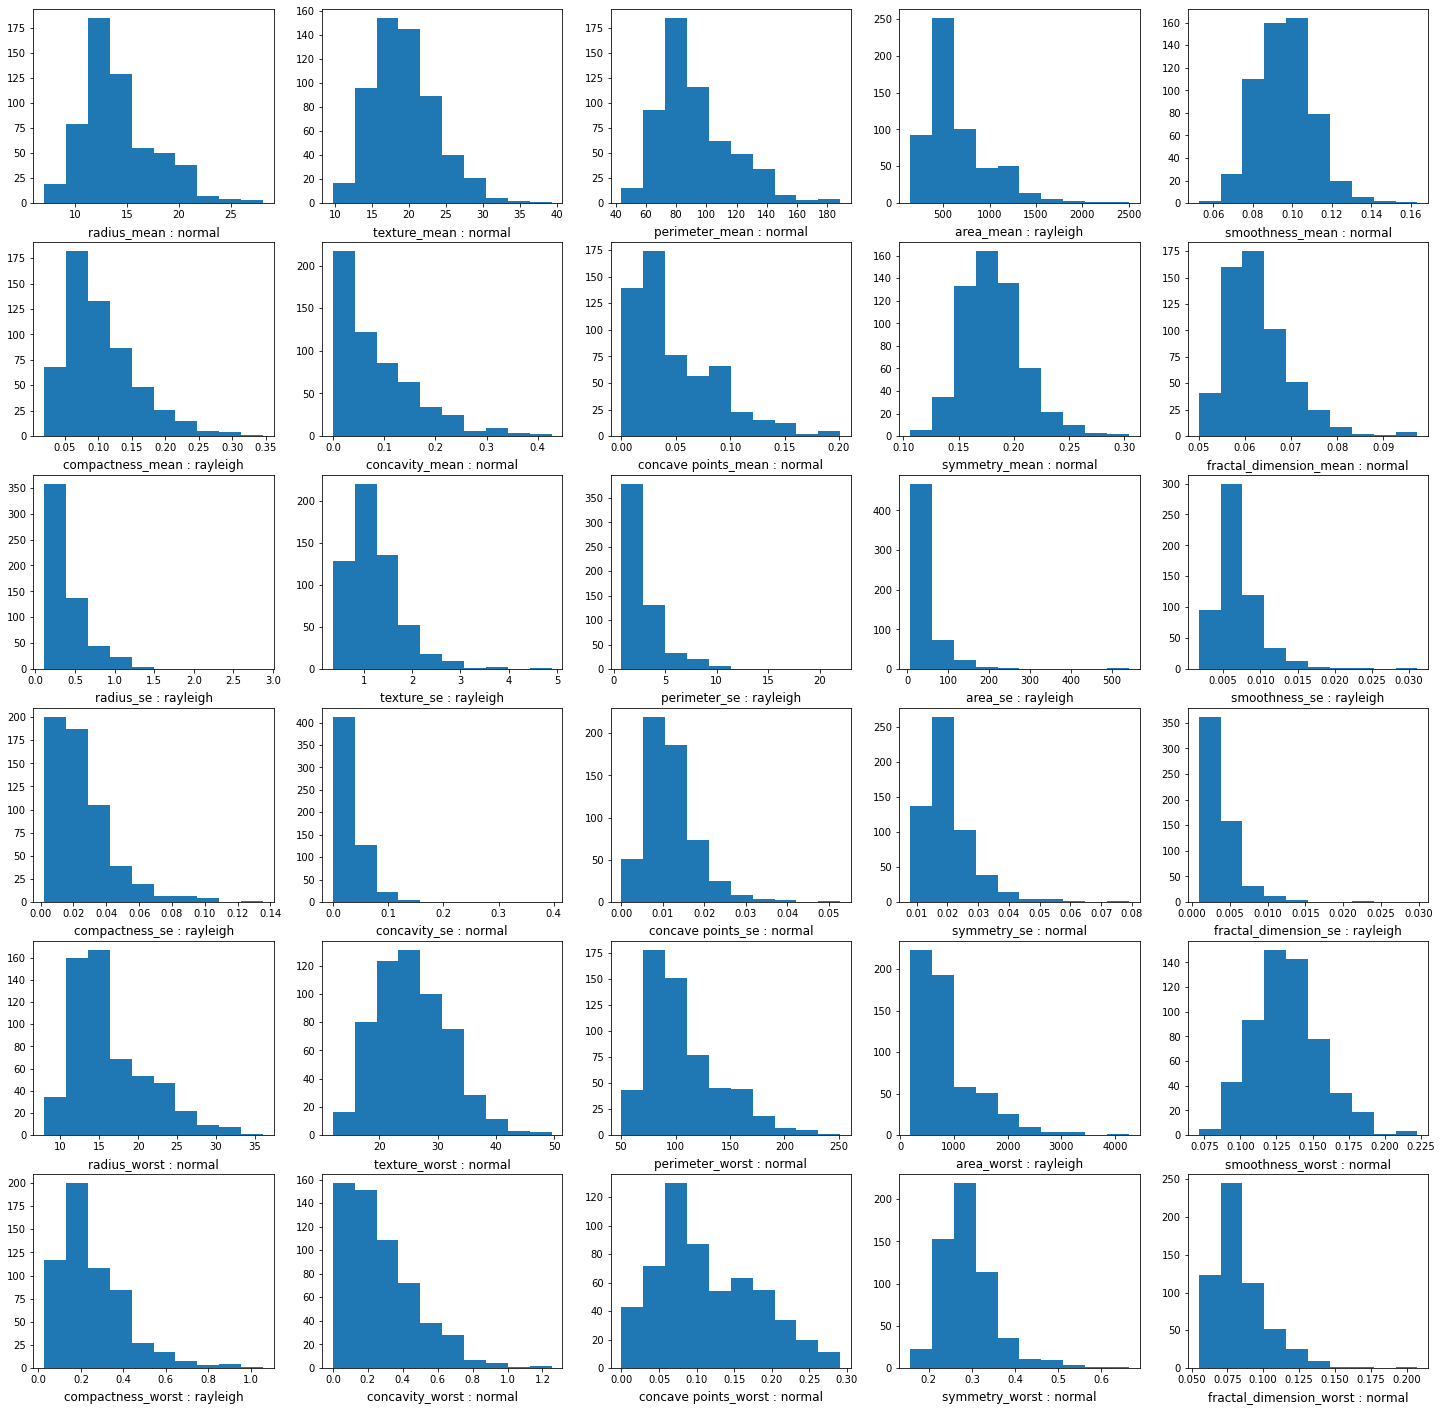

In [37]:
fig,axes = plt.subplots(6,5,figsize=(25,25))

for i in range(0,6):
    
    for j in range(0,5):
        
        axes[i,j].hist(data[columns_names_array[i,j]])
        
        axes[i,j].set_title(columns_names_array[i,j]+" : "+Distributions[columns_names_array[i,j]],y=-0.2)

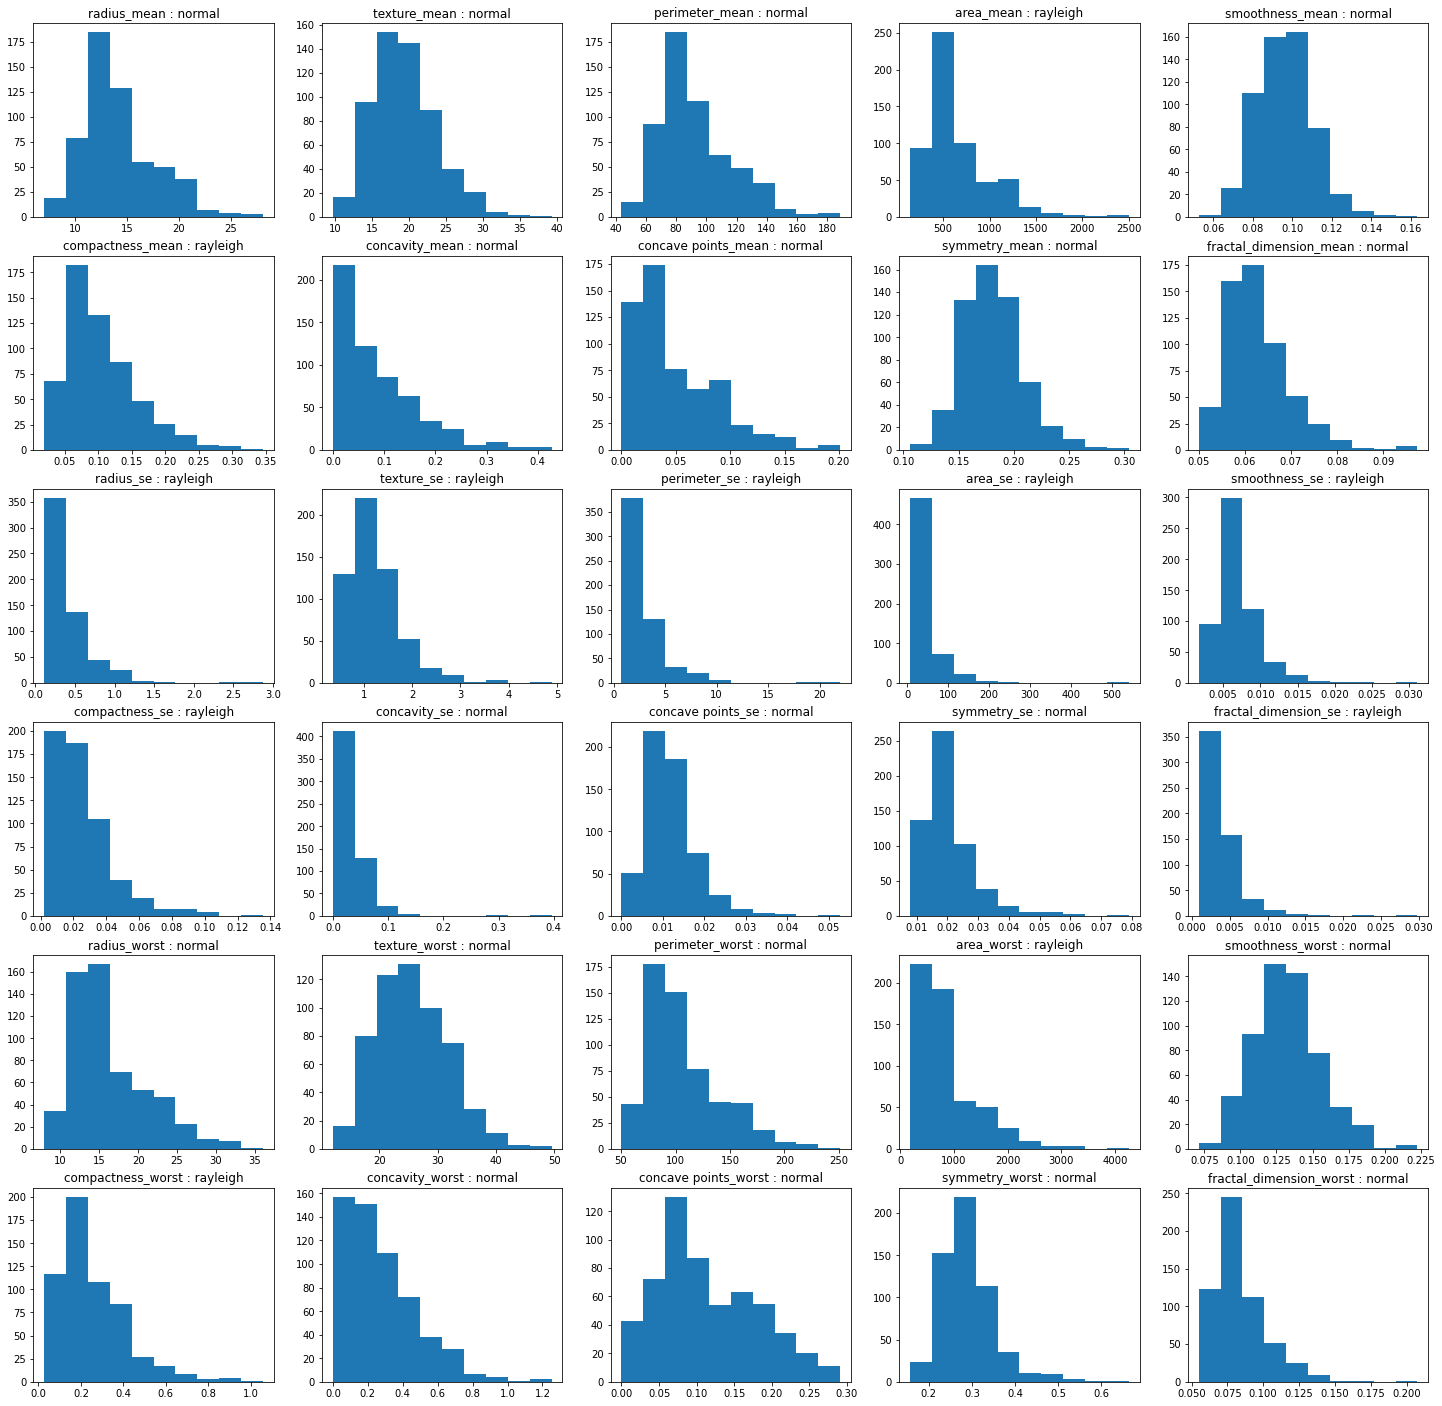

In [41]:
fig,axes = plt.subplots(6,5,figsize=(25,25))

for i in range(0,6):
    
    for j in range(0,5):
         
        axes[i,j].hist(data[columns_names_array[i,j]])
        axes[i,j].set_title(columns_names_array[i,j]+" : "+Distributions[columns_names_array[i,j]])